# Comparison of Compression Formats for Conda Packages

Conda packages are bz2-compressed tarballs. This notebook explores other compression formats for conda packages.

## The Contenders

 * **.tar.bz2 (bz2)**: The status quo, better compression ratio than gzip but longer decompression times.
 * **.tar.gz (gz)**: Traditional gzip compresson.
 * **.tar.gz (zopfli)**: The [zopfli](https://github.com/google/zopfli) algorithm creates gzip-compatible archives with a better compression ratio than traditional gzip compression, at the cost of slower compression speed. 
 * **.tar.gz (zopfli50)**: The same as zopfli, except using 50 iterations instead of the standard 15. This creates better compression at the cost of even slower compression speed.
 * ** .zip (zip)**: The traditional `.zip` format. Uses zlib compression as well, and so has similar properties as `.tar.gz`.
 * **.tar.xz (xz)**: The [xz format](http://tukaani.org/xz) uses the LZMA2 compression algorithm which features better compression ratio and faster decompression speed than bz2, but slower compression speed.
 * **.tar.xz (xz9)**: Same as xz, except uses the `xz -9` flag which uses up to ~700 MiB of memory at compression for a better compression ratio.
 * **.7z (7z)**: [7-zip](http://www.7-zip.org/) also uses the LZMA2 compressor but uses its own archive format instead of tar.
 * **.7z (7z9)**: Same as 7z, except it uses the `mx=9` flag which uses up to ~700 MiB of memory at compression for a better compression ratio.
 * **.tar.zstd (zstd)**: [zstd](http://www.zstd.net) is a compression algortihm developed by facebook for real-time use. It features a compression ratio similar to bzip2 but a better decompression speed.
 * **.tar.zstd (zstd19)**: Same  as `.tar.zstd` but using the `-19` flag to improve the compression ratio at the expense of compression speed. Decompression speed is unaffected.
 * **.tar.br (brotli24)**: Google's [brotli](https://github.com/google/brotli) algorithm with standard settings. Provides better compression ratio than zstd at similar decompression speed but slower compression. Run with maximum compression settings `-q 11 -w 24` which are very close to the default settings (`-q 11 -w 22`).

## Overview

Note the compression speed, decompression speed and compression ratio are just a general sentiment relative to the other algorithms. See the analysis in the remainder of the notebook for details.

<table>
  <tr>
    <th>Algorithm</th>
    <th>Py2.7</th>
    <th>Py3.4</th>
    <th>Compression Speed</th>
    <th>Decompression Speed</th>
    <th>Compression Ratio</th>
    <th>Compression Memory</th>
    <th>Decompression Memory</th>
    <th>External Library</th>
  </tr>
  <tr>
    <td>bz2</td>
    <td style="background-color: green"></td>
    <td style="background-color: green"></td>
    <td style="background-color: green">fast</td>
    <td style="background-color: red">slow</td>
    <td style="background-color: yellow">medium</td>
    <td>6.8M</td>
    <td>3.9M</td>
    <td>N/A</td>
  </tr>
  <tr>
    <td>gz</td>
    <td style="background-color: green"></td>
    <td style="background-color: green"></td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: red">low</td>
    <td>680K</td>
    <td>500K</td>
    <td>N/A</td>
  </tr>
  <tr>
    <td>zopfli(50)</td>
    <td style="background-color: green"></td>
    <td style="background-color: green"></td>
    <td style="background-color: red">slow</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: orange">low/medium</td>
    <td>100M</td>
    <td>500K (gzip)</td>
    <td><a href="https://github.com/google/zopfli">zopfli</a> (compression only)</td>
  </tr>
  <tr>
    <td>zip</td>
    <td style="background-color: green"></td>
    <td style="background-color: green"></td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: red">low</td>
    <td>600K</td>
    <td>500K</td>
    <td>N/A</td>
  </tr>
  <tr>
    <td>xz</td>
    <td style="background-color: red"></td>
    <td style="background-color: green"></td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: green">high</td>
    <td>93M</td>
    <td>8.6M</td>
    <td><a href="https://pypi.python.org/pypi/backports.lzma">backports.lzma</a></td>
  </tr>
  <tr>
    <td>xz9</td>
    <td style="background-color: red"></td>
    <td style="background-color: green"></td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: green">high</td>
    <td>673M</td>
    <td>64M</td>
    <td><a href="https://pypi.python.org/pypi/backports.lzma">backports.lzma</a></td>
  </tr>
  <tr>
    <td>7z</td>
    <td style="background-color: red"></td>
    <td style="background-color: red"></td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">high</td>
    <td>1171M (8-thread)</td>
    <td>18M</td>
    <td><a href="https://pypi.python.org/pypi/libarchive">libarchive</a> or <a href="https://pypi.python.org/pypi/pyunpack">pyunpack</a> (possibly others)</td>
  </tr>
  <tr>
    <td>7z9</td>
    <td style="background-color: red"></td>
    <td style="background-color: red"></td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">high</td>
    <td>4372M (8-thread)</td>
    <td>71M</td>
    <td><a href="https://pypi.python.org/pypi/libarchive">libarchive</a> or <a href="https://pypi.python.org/pypi/pyunpack">pyunpack</a> (possibly others)</td>
  </tr>
  <tr>
    <td>zstd</td>
    <td style="background-color: red"></td>
    <td style="background-color: red"></td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: yellow">medium</td>
    <td>2.5M</td>
    <td>1.8M</td>
    <td><a href="https://github.com/indygreg/python-zstandard">python-zstandard</a></td>
  </tr>
  <tr>
    <td>zstd19</td>
    <td style="background-color: red"></td>
    <td style="background-color: red"></td>
    <td style="background-color: yellow">medium</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: lightgreen">medium/high</td>
    <td>57M</td>
    <td>8.9M</td>
    <td><a href="https://github.com/indygreg/python-zstandard">python-zstandard</a></td>
  </tr>
  <tr>
    <td>brotli</td>
    <td style="background-color: red"></td>
    <td style="background-color: red"></td>
    <td style="background-color: red">slow</td>
    <td style="background-color: green">fast</td>
    <td style="background-color: green">high</td>
    <td>205M</td>
    <td>25M</td>
    <td><a href="https://github.com/google/brotli">brotli</a></td>
  </tr>
</table>

The *Py2.7* and *Py3.4* columns indicate whether the tools for *de*compression are available in the Python standard library. If a separate tool or library is needed for compression and/or decompression, it is noted in the *External Library* column.

It should be noted that, in a single-producer/multi-consumer scenario such as with conda packages, compression size and decompression speed are typically the most important observables, not so much compression speed. `.tar.bz2` is doing fairly poor in that regard, so this suggests there is room for improvement.

Memory is measured by (de)compressing a 1G file and recording the maximum memory usage of the process as reported by the MEM column in `top`. 7z seems to use multiple cores for compression (but not decompression), and therefore the memory consumption probably depends on the number of threads.

Note: both `.tar.xz` and `.7z` use the LZMA2 algorithm, but (as far as I understand) the difference is that in the case of `.tar.xz` a tar file is compressed as a single LZMA stream, whereas for `.7z` every file in the archive is its own LZMA stream. It allows to apply different filters for different files in the archive, for example x86 machine code can be compressed better by using a branch-call-jump (BCJ) filter. By default, the `7z` archiver seems to use multiple cores for compression but only a single core for decompression. However, multiple LZMA streams cause somewhat higher overhead, and so it depends on a case-by-case basis which results in a better compression ratio. The `.xz` format also allows compression in multiple LZMA2 blocks using the `--threads` option, but multi-core decompression is not implemented.

The `-9` or `-mx=9` options for `.tar.xz` and `.7z`, respectively, are only useful for large archives. For small archives below ~15 MiB, there is no significant effect on the compression ratio but the price for higher memory still needs to be paid.

## The procedure

The following is a brief study about possible benefits when conda used other package formats than `.tar.bz2` for its packages. All (osx-64) packages needed to create a small environment containing `python` and `numpy` are studied. The original `.tar.bz2` package is extracted, then added to an archive. The uncompressed size, compressed size and compression times are recorded. It is then extracted to the filesystem 10 times in a row, and the median extraction time is recorded as well. The packages studied are (in descending order of package size):

 * [mkl-2017.0.1-0](https://anaconda.org/anaconda/mkl/2017.0.1/download/osx-64/mkl-2017.0.1-0.tar.bz2)
 * [python-3.6.0-0](https://anaconda.org/anaconda/python/3.6.0/download/osx-64/python-3.6.0-0.tar.bz2)
 * [numpy-1.12.0-py36_0](https://anaconda.org/anaconda/numpy/1.12.0/download/osx-64/numpy-1.12.0-py36_0.tar.bz2)
 * [openssl-1.0.2k-0](https://anaconda.org/anaconda/openssl/1.0.2k/download/osx-64/openssl-1.0.2k-0.tar.bz2)
 * [tk-8.5.18-0](https://anaconda.org/anaconda/tk/8.5.13/download/osx-64/tk-8.5.18-0.tar.bz2)
 * [pip-9.0.1-py36_1](https://anaconda.org/anaconda/pip/9.0.1/download/osx-64/pip-9.0.1-py36_1.tar.bz2)
 * [sqlite-3.13.0-0](https://anaconda.org/anaconda/sqlite/3.13.0/download/osx-64/sqlite-3.13.0-0.tar.bz2)
 * [readline-6.2-2](https://anaconda.org/anaconda/readline/6.2/download/osx-64/readline-6.2-2.tar.bz2)
 * [xz-5.2.2-1](https://anaconda.org/anaconda/xz/5.2.2/download/osx-64/xz-5.2.2-1.tar.bz2)
 * [zlib-1.2.8-3](https://anaconda.org/anaconda/zlib/1.2.8/download/osx-64/zlib-1.2.8-3.tar.bz2)
 * [setuptools-27.2.0-py36_0](https://anaconda.org/anaconda/setuptools/27.2.0/download/osx-64/setuptools-27.2.0-py36_0.tar.bz2)
 * [wheel-0.29.0-py36_0](https://anaconda.org/anaconda/wheel/0.29.0/download/osx-64/wheel-0.29.0-py36_0.tar.bz2)

The code which performs the test is available as [xztest.py](xztest.py) in this repository.

Ultimately, as a final figure of merit, the combined download and extraction time is computed assuming a download bandwidth of 100 KiB/s, 1 MiB/s and 10 MiB/s.

In [1]:
%matplotlib inline

In [2]:
import os
import json
import numpy
import matplotlib.pyplot as plt

In [3]:
rootdir = os.getcwd()
workdir = os.path.join(rootdir, 'work')

In [4]:
packages = os.listdir(workdir)

In [5]:
def load_result(package):
    with open(os.path.join(workdir, package, 'result.json'), 'r') as f:
        return json.load(f)
results = {package: load_result(package) for package in packages}

In [18]:
algos = ['bz2', 'gz', 'zopfli', 'zopfli50', 'zip', 'xz', 'xz9', '7z', '7z9', 'zstd', 'zstd19', 'brotli24']
algo_colors=['y', 'b', 'darkblue', 'darkblue', 'lightblue', 'red', 'red', 'darkred', 'darkred', 'green', 'green', 'lightgreen']

In [19]:
packages = sorted(results, key=lambda x: -results[x]['uncompressed_size'])

In [20]:
compression_times = {package: [result[algo]['compression_time'] for algo in algos]
                     for package, result in results.items()}
decompression_times = {package: [numpy.median(result[algo]['decompression_time']) for algo in algos]
                       for package, result in results.items()}
compression_sizes = {package: [result[algo]['compressed_size'] for algo in algos]
                       for package, result in results.items()}
compression_ratios = {package: [result[algo]['compressed_size'] / result['uncompressed_size'] for algo in algos]
                       for package, result in results.items()}

In [21]:
def make_algos_bar_ax(ax, bars, title, ylabel, ylog=False):
    ax.bar(numpy.arange(len(algos))+0.6, bars, color=algo_colors, log=ylog)
    ax.set_title(title)
    ax.set_xlim(0.5,len(algos)+0.5)
    ax.set_xticks(numpy.arange(len(algos))+1)
    ax.set_xticklabels(algos)
    ax.set_ylabel(ylabel)
    ax.grid()

    for label in ax.get_xmajorticklabels():
        label.set_rotation(90)
        label.set_horizontalalignment("center")

def make_algos_bar_plot(bars, title, ylabel, ylog=False):
    fig, ax = plt.subplots()
    make_algos_bar_ax(ax, bars, title, ylabel, ylog=ylog)
    
def make_packages_bar_plot(array, packages, title, ylabel, ylog=False):
    nrows = (len(packages) + 2) // 3;
    fig, ax = plt.subplots(nrows, 3, figsize=(12, 5*nrows),
                           gridspec_kw={'left': 0.0, 'right': 0.9, 'hspace': 0.3})
    for index, package in enumerate(packages):
        make_algos_bar_ax(ax[index // 3][index % 3],
                          array[package],
                          '{} {}'.format(package, title),
                          ylabel, ylog=ylog)

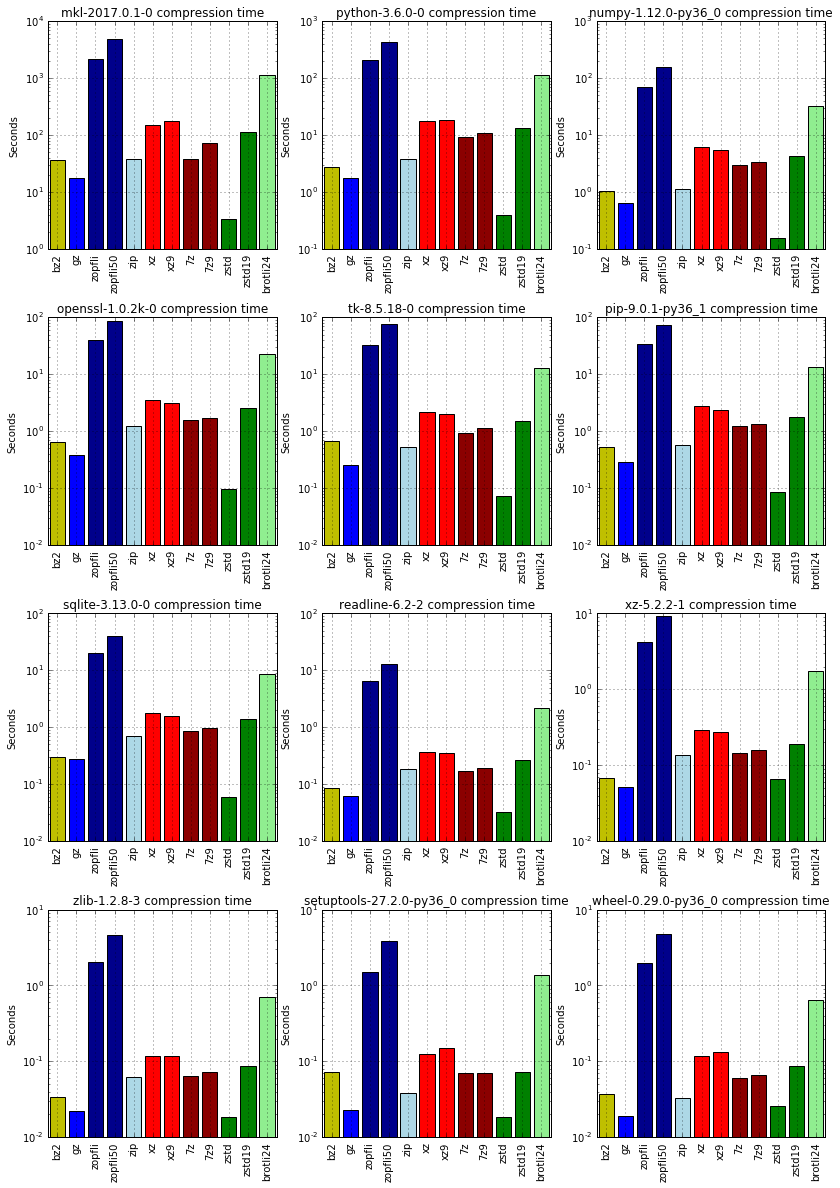

In [22]:
make_packages_bar_plot(compression_times, packages,
                       'compression time',
                       'Seconds', ylog=True)

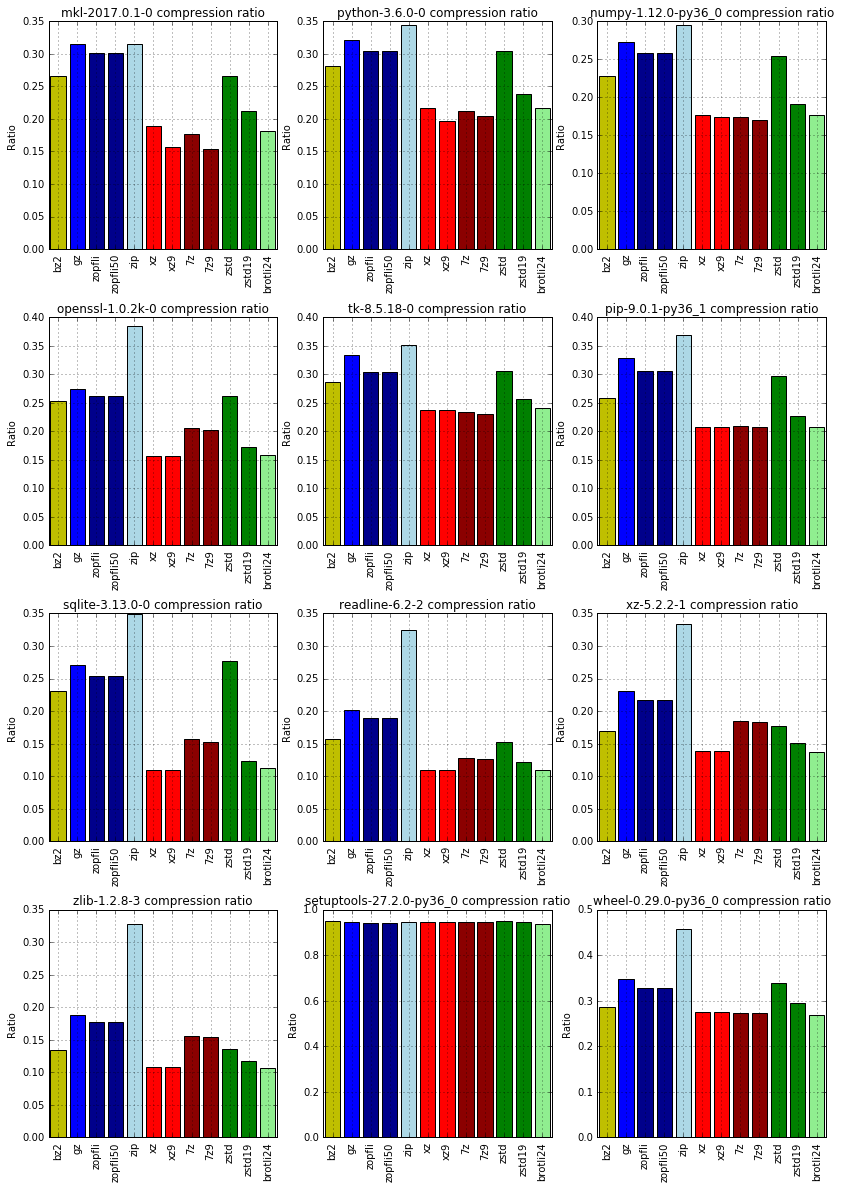

In [23]:
make_packages_bar_plot(compression_ratios, packages,
                       'compression ratio',
                       'Ratio')

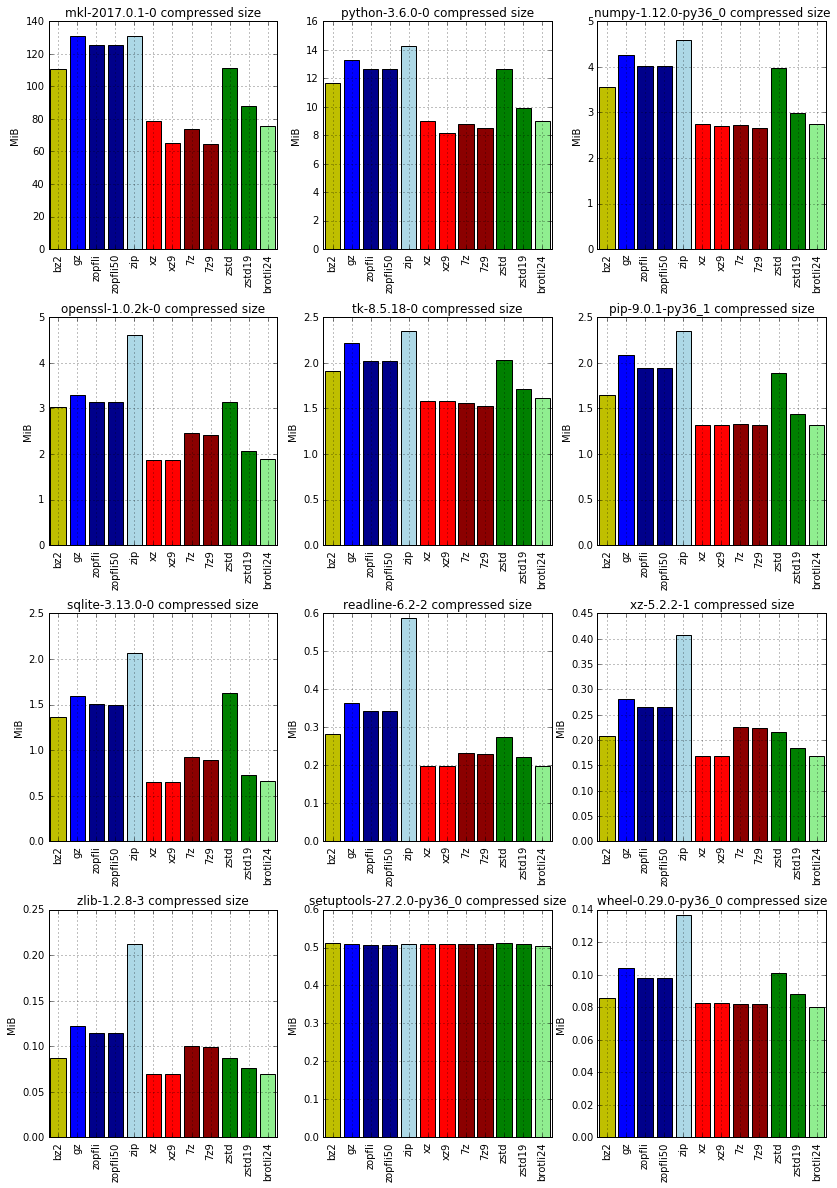

In [24]:
make_packages_bar_plot({package: numpy.array(x) / 1024 / 1024
                        for package, x in compression_sizes.items()},
                       packages,
                       'compressed size',
                       'MiB')

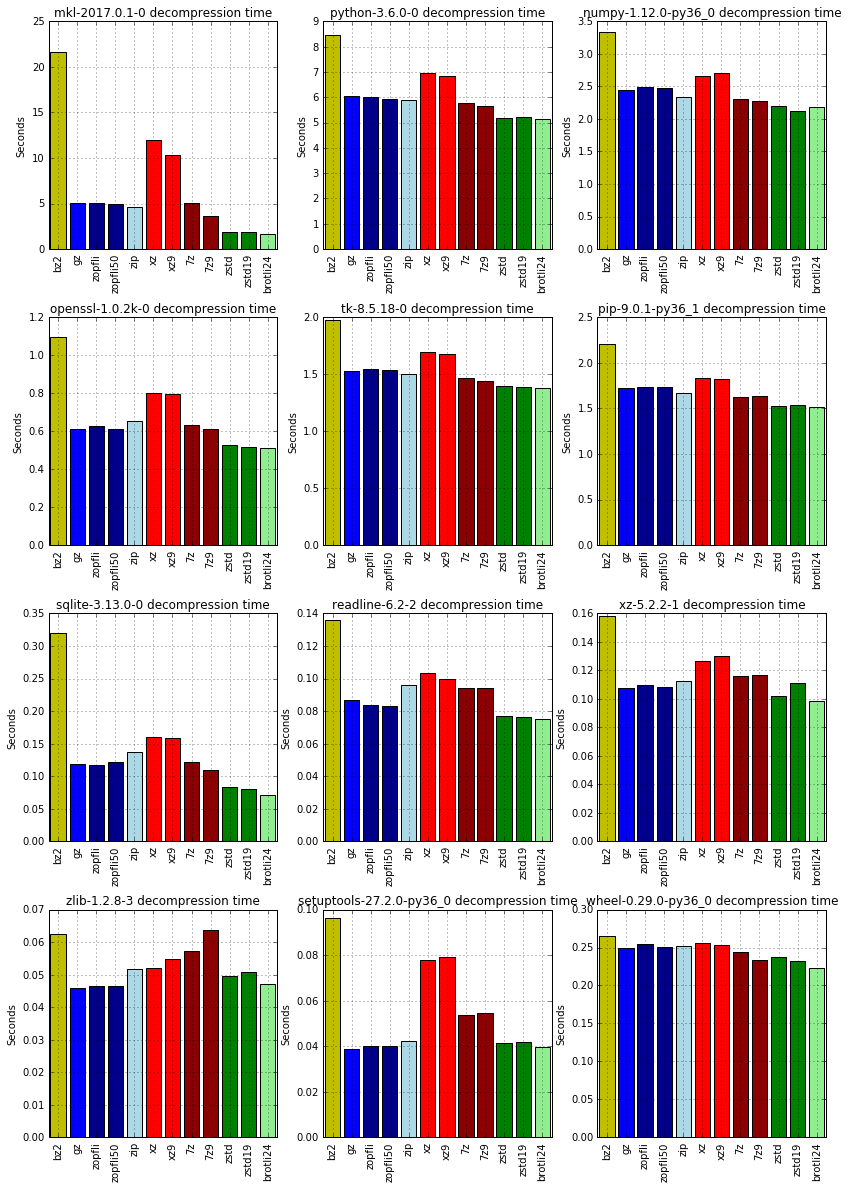

In [25]:
make_packages_bar_plot(decompression_times, packages,
                       'decompression time',
                       'Seconds')

The decompression times not only include the time for decompression alone, but also writing the extracted files to the filesystem. This explains the following observation:

The decompression time charts show somewhat different behavior for different packages. For example, for MKL the decompression times vary widely while for python they are all within a factor of 2. The difference between the packages is that MKL contains a small number of large file, whereas Python contains a large number of (mostly) small files. Therefore, in the latter case, there is much more overhead interacting with the filesystem, leading to the seemingly lower limit of around 5s.

In [15]:
def calc_download_and_extract_times(algos, decompression_times, compression_sizes, dlspeed):
    """dlspeed in bytes/sec"""
    x = [[decompression_time + compression_size / dlspeed
             for decompression_time, compression_size
                in zip(decompression_times[package], compression_sizes[package])]
            for package in decompression_times]
    return numpy.array(x).sum(axis=0)

In [16]:
final100 = calc_download_and_extract_times(
    algos, decompression_times, compression_sizes, 100*1024)
final1000 = calc_download_and_extract_times(
    algos, decompression_times, compression_sizes, 1024*1024)
final10000 = calc_download_and_extract_times(
    algos, decompression_times, compression_sizes, 10*1024*1024)

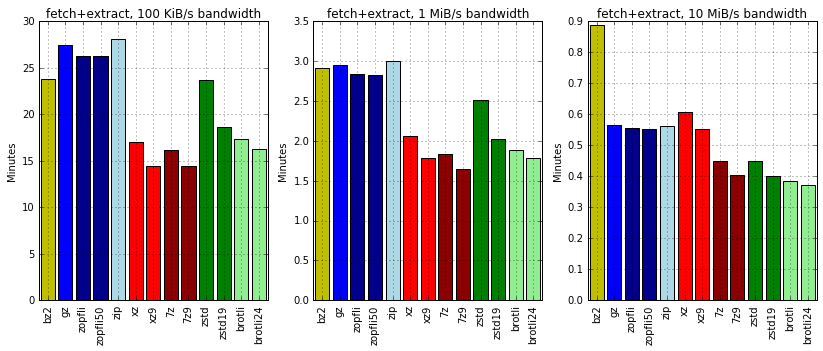

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5),
                       gridspec_kw={'left': 0.0, 'right': 0.9, 'hspace': 0.3})

for axobj, data, bandwidth in zip(ax,
                                  (final100, final1000, final10000),
                                  ('100 KiB/s', '1 MiB/s', '10 MiB/s')):
    make_algos_bar_ax(axobj,
                      data / 60,
                      'fetch+extract, {} bandwidth'.format(bandwidth),
                      'Minutes')

### Conclusion

Basically all contenders except the gzip-based ones in low-bandwidth scenarios outperform bzip2 in all scenarios. There seems to be a potentiol to reduce the overall fetch-and-extract time by 30%. If slow compression speeds are of no concern, then the brotli algorithm combines a high compression ratio with fast decompression speed and reasonable memory requirements. The upstream brotli repository contains a Python module that is compatible with both Python 2 and Python 3. However, there are several other compromises to be made, including compression speed and memory requirements, availability in the Python standard library, and other available tooling.

In that light, the `.tar.xz` format shines given that it outperforms `.bz2` in all three bandwidth scenarios and is well integrated with standard unix tools, such as `tar`. This includes msys2 on Windows, and most other Windows programs that can handle `.tar.bz2` can also handle `.tar.xz`. The Linux kernel project has stopped distributing Linux kernels in `.tar.bz2` format in favor of `.tar.xz` (and in addition to `.tar.gz`) in 2013. Python contains out-of-the-box support for `.tar.xz` in its `tarfile` and `lzma` modules since Python 3.3. For Python 2.x, the `backports.lzma` third-party package would be required.